# 파일 및 모듈 불러오기

In [9]:
""" 모듈 """
import pandas as pd

# matplotlib 한글설정
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

from IPython.display import Image

""" 파일 """
starbucks = pd.read_excel('(종합)Starbucks_Stores.xlsx')
ediya = pd.read_excel('(종합)Ediya_Stores.xlsx', sheet_name='Sheet2')
parks = pd.read_csv('전국도시공원정보표준데이터.csv', encoding='cp949')

## 스타벅스 데이터 파악하기

In [8]:
starbucks.head(3)

Unnamed: 0  code     name                   address type  \
0           0  3762  역삼아레나빌딩   서울특별시 강남구 언주로 425 (역삼동)  NaN   
1           1  3672   논현역사거리  서울특별시 강남구 강남대로 538 (논현동)  NaN   
2           2  3858  신사역성일빌딩  서울특별시 강남구 강남대로 584 (논현동)  NaN   

             service                  loc&fac        lat        long  
0  현금없는 매장, 피지오, 블론드  지하철 인접, 공기청정기, 장애인 편의시설  37.501087  127.043069  
1  현금없는 매장, 피지오, 블론드        병원, 지하철 인접, 공기청정기  37.510178  127.022223  
2  현금없는 매장, 피지오, 블론드               병원, 지하철 인접  37.514132  127.020563

## 이디야 데이터 파악하기

In [10]:
ediya.head(3)

상가업소번호    상호명    지점명  시도명 시군구명          경도         위도 json매핑
0  23377886  이디야커피    가평점  경기도  가평군  127.514301  37.828947     가평
1  23517870  이디야커피    청평점  경기도  가평군  127.421679  37.739164     가평
2  23400873  이디야커피  가평현리점  경기도  가평군  127.350222  37.818181     가평

## 공원 데이터 파악하기

In [3]:
parks.head(3)

관리번호   공원명  공원구분 소재지도로명주소             소재지지번주소         위도  \
0  29170-00009  두암제1  근린공원      NaN  광주광역시 북구 두암동 969-4  35.165104   
1  29170-00010  일곡제1  근린공원      NaN  광주광역시 북구 일곡동 850-1  35.207975   
2  29170-00011  일곡제2  근린공원      NaN  광주광역시 북구 일곡동 820-2  35.206500   

           경도     공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설)  \
0  126.937650  13383.5          NaN          NaN          NaN          NaN   
1  126.895445  34840.3          NaN          NaN          NaN          NaN   
2  126.898395  10315.0          NaN          NaN          NaN          NaN   

  공원보유시설(기타시설)       지정고시일     관리기관명          전화번호     데이터기준일자   제공기관코드  제공기관명  
0          NaN  1990-12-12  광주광역시 북구  062-613-4222  2020-07-08  6290000  광주광역시  
1          NaN  1993-12-06  광주광역시 북구  062-613-4222  2020-07-08  6290000  광주광역시  
2          NaN  1993-12-06  광주광역시 북구  062-613-4222  2020-07-08  6290000  광주광역시

## 산점도로 파악하기 -> 육안으로 이상치를 파악하기 위해

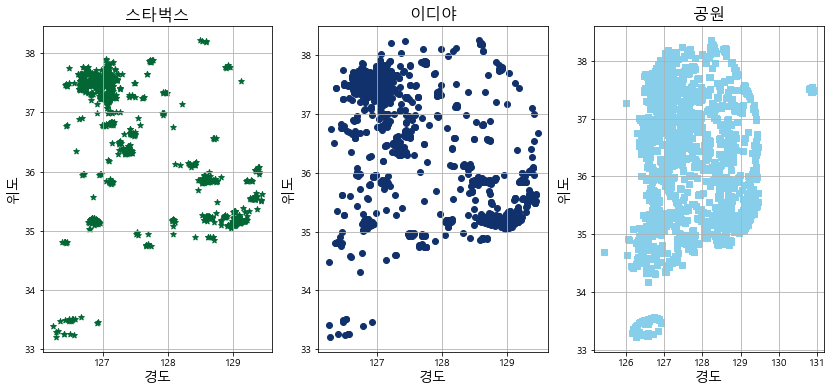

In [40]:
plt.figure(figsize = (14, 6))

""" 스타벅스는 초록색 스타 """
plt.subplot(1, 3, 1)
plt.scatter(x=starbucks['long'], y=starbucks['lat'], color='#036635', marker='*')
plt.grid()
plt.title('스타벅스', fontsize=16)
plt.xlabel('경도', fontsize=14)
plt.ylabel('위도', fontsize=14)

""" 이디야는 네이비 원 """
plt.subplot(1, 3, 2)
plt.scatter(x=ediya['경도'], y=ediya['위도'], color='#10316b', marker='o')
plt.grid()
plt.title('이디야', fontsize=16)
plt.xlabel('경도', fontsize=14)
plt.ylabel('위도', fontsize=14)

""" 공원은 하늘색 사각형"""
plt.subplot(1, 3, 3)
plt.scatter(x=parks['경도'], y=parks['위도'], color='skyblue', marker='s')
plt.grid()
plt.title('공원', fontsize=16)
plt.xlabel('경도', fontsize=14)
plt.ylabel('위도', fontsize=14)
plt.show()

# 이상치 제거
- 스타벅스 데이터는 이상없어 보이는데... 과연?
- 우리나라 공원이 동중국해와 일본에?

In [5]:
parks[parks['위도'] < 28][['공원명', '위도', '경도']]

공원명         위도          경도
12972  와우공원  27.551606  126.929047

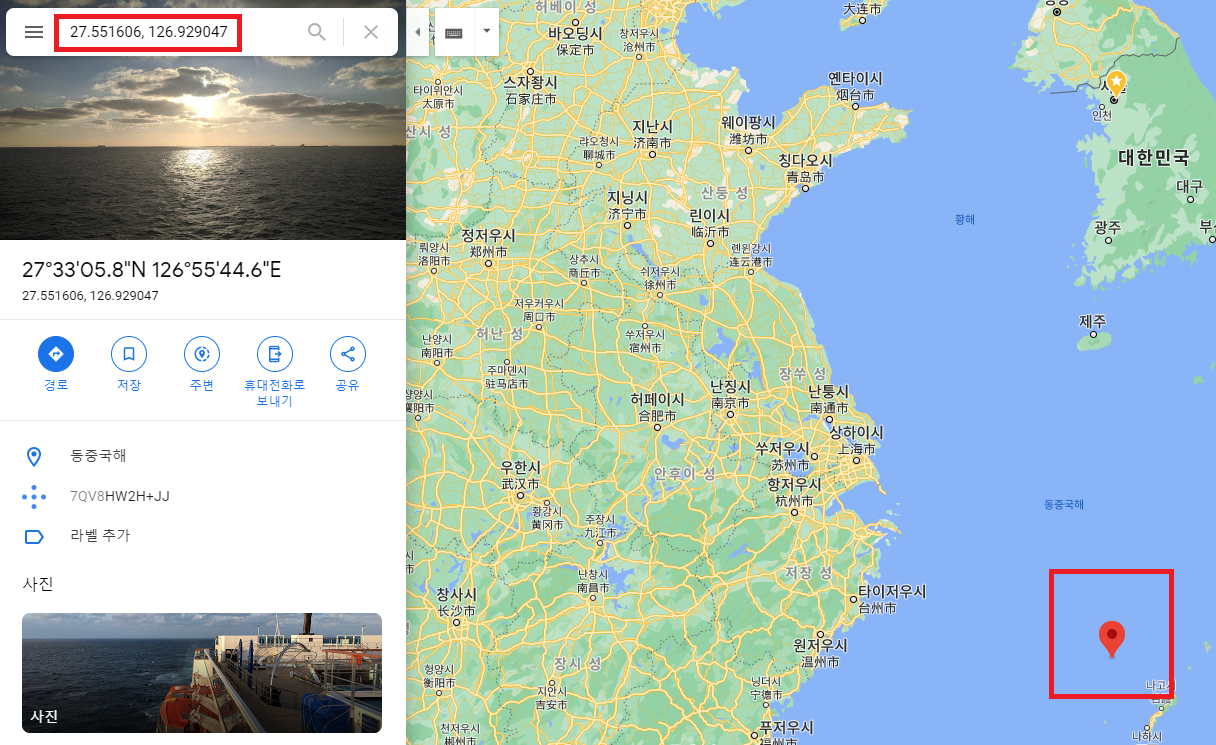

In [6]:
Image('이상치1.png')

In [7]:
parks[parks['경도'] > 136][['공원명', '위도', '경도']]

공원명         위도          경도
7229  근린공원5(만수공원)  36.374204  137.202661

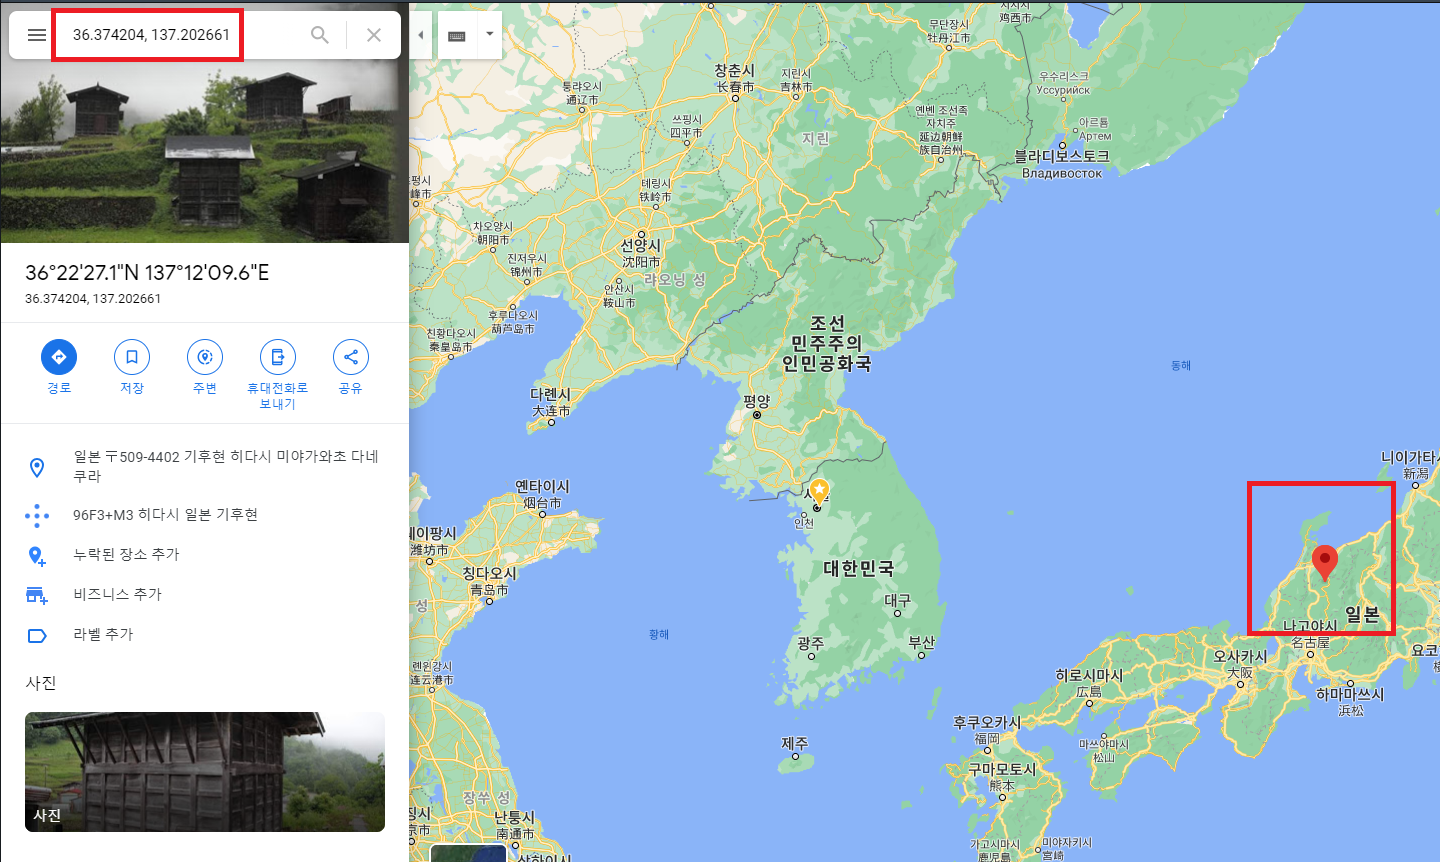

In [8]:
Image('이상치2.png')

## IQR(계수 : 3)로 파악하기

### 스타벅스 - 위도

In [9]:
# 위도
q1 = starbucks['lat'].quantile(0.25)
q3 = starbucks['lat'].quantile(0.75)
iqr = 3*(q3-q1)

In [10]:
starbucks[starbucks['lat'] > q3 + iqr][['name', 'address', 'lat', 'long']]

Empty DataFrame
Columns: [name, address, lat, long]
Index: []

In [11]:
starbucks[starbucks['lat'] < q1 - iqr][['name', 'address', 'lat', 'long']]

Empty DataFrame
Columns: [name, address, lat, long]
Index: []

### 스타벅스 - 경도

In [12]:
# 경도
q1 = starbucks['long'].quantile(0.25)
q3 = starbucks['long'].quantile(0.75)
iqr = 3*(q3-q1)

In [13]:
starbucks[starbucks['long'] > q3 + iqr][['name', 'address', 'lat', 'long']]

name                       address        lat        long
1039  금정남산동DT     부산광역시 금정구 중앙대로 1989 (남산동)  35.262466  129.091353
1040   금정구청DT     부산광역시 금정구 중앙대로 1730 (부곡동)  35.238784  129.092964
1041   온천장역DT       부산광역시 금정구 식물원로 13 (장전동)  35.224006  129.086560
1042     부산외대                부산광역시 금정구 금샘로   35.264013  129.084755
1043    부산대정문  부산광역시 금정구 부산대학로64번길 12 (장전동)  35.232107  129.084565
...       ...                           ...        ...         ...
1361   포항죽도DT   경상북도 포항시 북구 새천년대로 486  에스오일  36.018521  129.347918
1362   포항장성DT  경상북도 포항시 북구 새천년대로 1255 (장성동)  36.074535  129.384214
1363     포항양덕     경상북도 포항시 북구 장량로 162 (양덕동)  36.081550  129.398161
1364     포항중앙      경상북도 포항시 북구 불종로 41 (신흥동)  36.038713  129.364099
1365  포항영일대비치     경상북도 포항시 북구 삼호로 186 (항구동)  36.054992  129.376981

[138 rows x 4 columns]

In [14]:
starbucks[starbucks['long'] < q1 - iqr][['name', 'lat', 'long']]

Empty DataFrame
Columns: [name, lat, long]
Index: []

### 공원 - 위도

In [15]:
# 위도
q1 = parks['위도'].quantile(0.25)
q3 = parks['위도'].quantile(0.75)
iqr = 3*(q3-q1)

In [16]:
parks[parks['위도'] > q3 + iqr][['공원명','소재지지번주소', '위도', '경도']]

Empty DataFrame
Columns: [공원명, 소재지지번주소, 위도, 경도]
Index: []

In [17]:
parks[parks['위도'] < q1 - iqr][['공원명','소재지지번주소', '위도', '경도']]

공원명                    소재지지번주소         위도          경도
12972  와우공원  서울특별시 마포구 창전동3-231 등 59필지  27.551606  126.929047

### 공원 - 경도

In [18]:
# 경도
q1 = parks['경도'].quantile(0.25)
q3 = parks['경도'].quantile(0.75)
iqr = 3*(q3-q1)

In [19]:
parks[parks['경도'] > q3 + iqr][['공원명','소재지지번주소', '위도', '경도']]

공원명                   소재지지번주소         위도          경도
7229  근린공원5(만수공원)  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661

In [20]:
parks[parks['경도'] < q1 - iqr][['공원명','소재지지번주소', '위도', '경도']]

Empty DataFrame
Columns: [공원명, 소재지지번주소, 위도, 경도]
Index: []

## IQR분석을 기각하는 이유

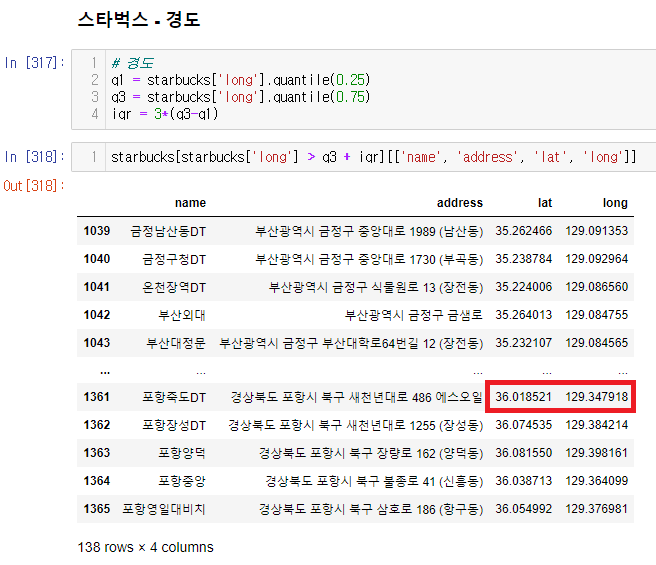

In [21]:
Image('IQR분석기각이유1.png')

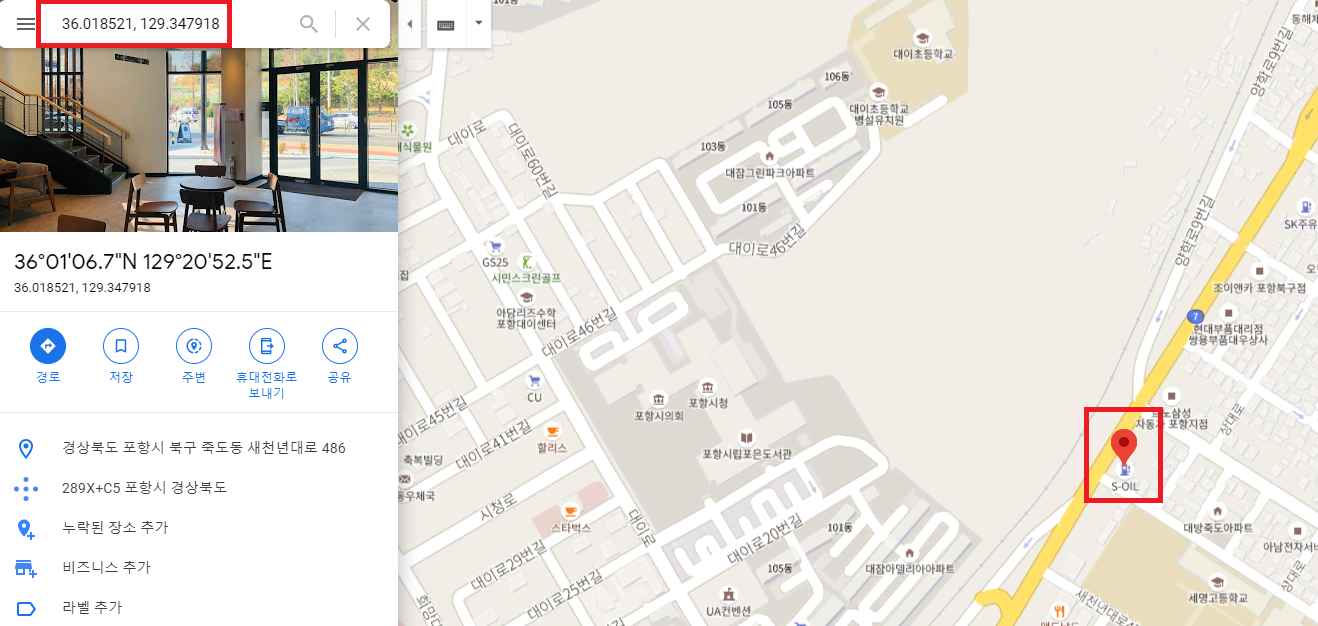

In [22]:
Image('IQR분석기각이유2.png')

### - IQR의 계수를 <U>"3"</U>으로 설정했음에도 이상치를 정밀하게 가려내진 못했다.
### - 따라서 산점도에서 <U>육안으로 보고</U> 제거하는 것이 낫겠다고 생각했다.
### - <U>공원 이상치</U>만 제거하고, 스타벅스와 이디야는 현상유지를 한다. <U>(동중국해, 일본 것만 제거)</U>

In [36]:
parks = parks[parks['위도'] > 28]
parks = parks[parks['경도'] < 136]

## 이상,결측 처리후 시각화

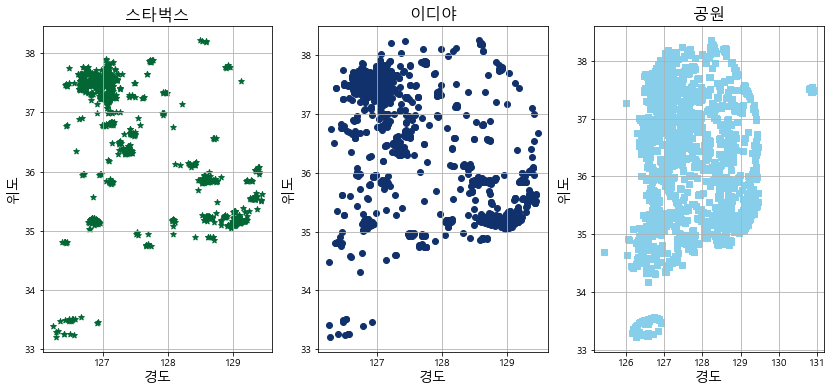

In [41]:
plt.figure(figsize = (14, 6))

""" 스타벅스는 초록색 스타 """
plt.subplot(1, 3, 1)
plt.scatter(x=starbucks['long'], y=starbucks['lat'], color='#036635', marker='*')
plt.grid()
plt.title('스타벅스', fontsize=16)
plt.xlabel('경도', fontsize=14)
plt.ylabel('위도', fontsize=14)

""" 이디야는 네이비 원 """
plt.subplot(1, 3, 2)
plt.scatter(x=ediya['경도'], y=ediya['위도'], color='#10316b', marker='o')
plt.grid()
plt.title('이디야', fontsize=16)
plt.xlabel('경도', fontsize=14)
plt.ylabel('위도', fontsize=14)

""" 공원은 하늘색 사각형"""
plt.subplot(1, 3, 3)
plt.scatter(x=parks['경도'], y=parks['위도'], color='skyblue', marker='s')
plt.grid()
plt.title('공원', fontsize=16)
plt.xlabel('경도', fontsize=14)
plt.ylabel('위도', fontsize=14)
plt.show()

# 결측치 처리하기

In [24]:
len(parks[parks['위도'].isnull()])

0

In [25]:
len(parks[parks['경도'].isnull()])

0

In [34]:
len(ediya[ediya['위도'].isnull()])

0

In [35]:
len(ediya[ediya['경도'].isnull()])

0

In [26]:
len(starbucks[starbucks['lat'].isnull()])

0

In [27]:
len(starbucks[starbucks['long'].isnull()])

0

## - 결측처리할 데이터는 없다.

# 분석/시각화 with seaborn

In [43]:
star_temp = {'kind':'starbucks',
             'lat':starbucks['lat'],
             'long':starbucks['long']}

ediya_temp = {'kind':'ediya',
             'lat':ediya['위도'],
             'long':ediya['경도']}

parks_temp = {'kind':'park',
             'lat':parks['위도'],
             'long':parks['경도']}

star_temp = pd.DataFrame(star_temp)
ediya_temp = pd.DataFrame(ediya_temp)
parks_temp = pd.DataFrame(parks_temp)

temp = pd.concat([star_temp, ediya_temp, parks_temp])

## 산점도로 파악하기

 ### 한번에 그리면 스타벅스가 가려짐

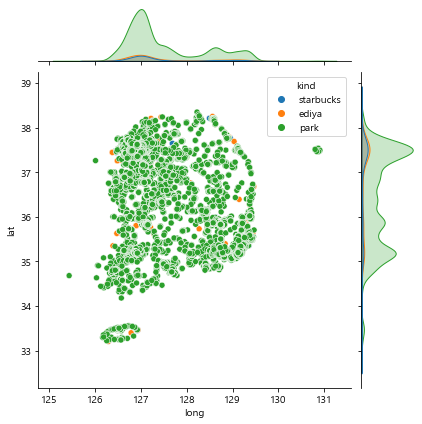

In [44]:
sns.jointplot(data=temp, x="long", y="lat", hue="kind")

### 분리해서 보기

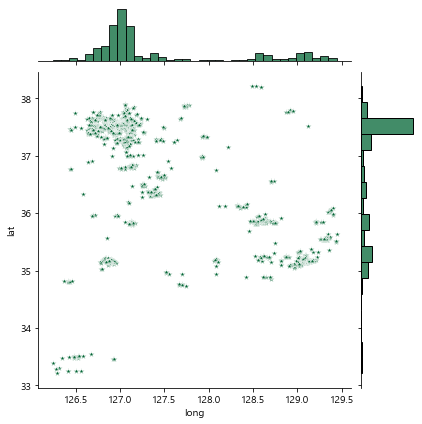

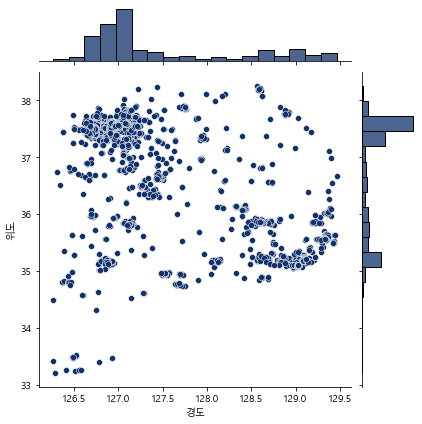

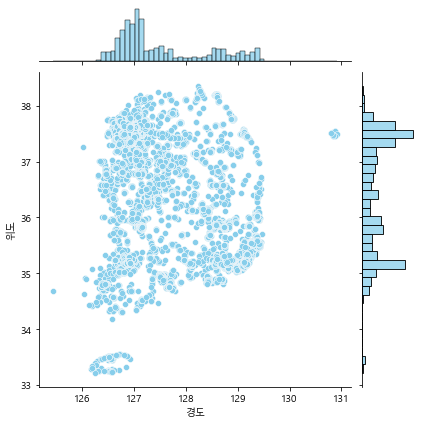

In [50]:
sns.jointplot(x='long', y='lat', data=starbucks, marker='*', color='#036635')
sns.jointplot(x='경도', y='위도', data=ediya, marker='o', color='#10316b')
sns.jointplot(x='경도', y='위도', data=parks, color='skyblue')

## 커널밀도추정으로 비슷하게 몰려있는지 보기

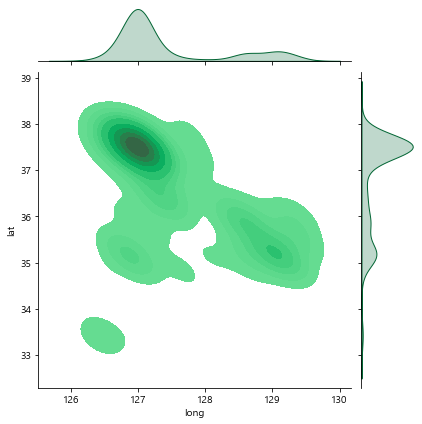

In [31]:
# 스타벅스
sns.jointplot(data=starbucks, x='long', y='lat', kind='kde', color='#036635', fill=True)

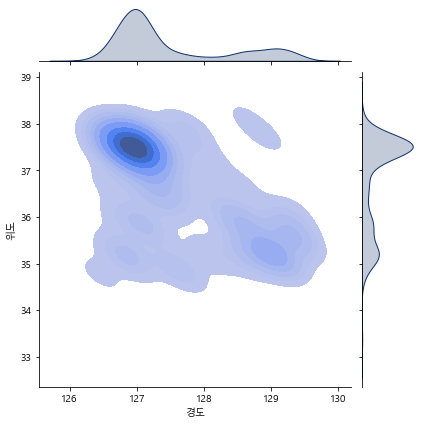

In [51]:
# 이디야
sns.jointplot(data=ediya, x='경도', y='위도', kind='kde', color='#10316b', fill=True)

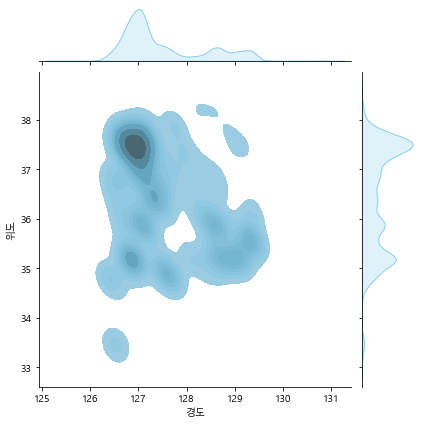

In [32]:
# 공원
sns.jointplot(data=parks, x='경도', y='위도', kind='kde', color='skyblue', fill=True)

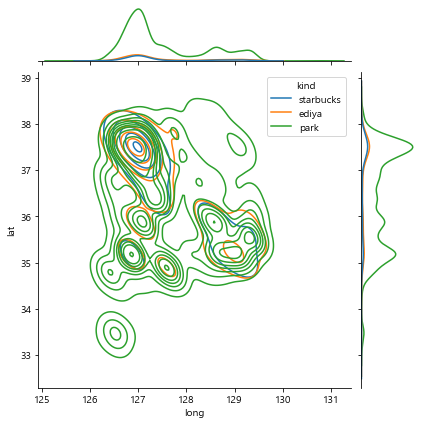

In [52]:
# 동시에
sns.jointplot(data=temp, x="long", y="lat", hue="kind", kind='kde')

## 비슷한 밀접도를 가지고 있는 것처럼 보인다.

# 지도 분석/시각화 with Leaflet of R
- folium으로 마켓클러스터링을 하려면 공원데이터를 모두 불러올 수 없음
- popup도 한글지원이 안됨. 저장해야만 한글이 뜸
- 따라서 이 대안으로 R을 사용함

## R로 만든 클러스터 객체 불러오기

In [53]:
from selenium import webdriver
import os

driver = webdriver.Chrome('C:/chromedriver.exe')
driver.get(os.path.join(os.getcwd(), '스타벅스-이디야-공원 마커클러스터링.html'))

# 행정구역별 스타벅스, 이디야, 공원 분포 알아보기 with folium

In [16]:
star_area = pd.read_excel('(종합)Starbucks_Stores.xlsx', sheet_name='Sheet2')
star_area.columns = ['id', 'count']
star_area

id  count
0        강릉      5
1    고성(강원)      1
2        동해      1
3        속초      3
4        원주      5
..      ...    ...
166   청주 상당      3
167   청주 서원      4
168   청주 청원      3
169   청주 흥덕      7
170      충주      4

[171 rows x 2 columns]

## 행정구역별 스타벅스

In [17]:
import folium
import json
import numpy as np

m = folium.Map(location=[35.95, 128.25],
               zoom_start=7)

geo_path = 'full_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 색상구분 - 8단계
bins = list(star_area['count'].quantile([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]))

folium.Choropleth(
    geo_data=geo_str,
    data=star_area,
    columns=['id', 'count'],
    key_on='feature.id',
    fill_color='BuGn',
    bins = bins
).add_to(m)

m

### 스타벅스는 한 곳(서울 강남)에 집중적으로 몰려 있다.

## 행정구역별 이디야

In [23]:
ediya_area = pd.read_excel('(종합)Ediya_Stores.xlsx', sheet_name='Sheet3')
ediya_area.columns = ['id', 'count']
ediya_area

id  count
0    가평      6
1    강릉     14
2    강진      1
3    거제      7
4    거창      1
..   ..    ...
227  홍성      3
228  홍천      3
229  화성     25
230  화천      1
231  횡성      2

[232 rows x 2 columns]

In [58]:
n = folium.Map(location=[35.95, 128.25],
               zoom_start=7)

geo_path = 'full_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 색상구분 - 8단계
bins = list(ediya_area['count'].quantile([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]))

folium.Choropleth(
    geo_data=geo_str,
    data=ediya_area,
    columns=['id', 'count'],
    key_on='feature.id',
    fill_color='PuBu',
    bins = bins
).add_to(n)

n

### 이디야는 그나마 고르게 분포하는 것 같다.

## 행정구역별 공원

In [21]:
park_area = pd.read_excel('공원가공2.xlsx', sheet_name='Sheet2')
park_area.columns = ['id', 'count']
park_area

id  count
0    가평     11
1    강릉     49
2    강진     10
3    거제     63
4    거창     16
..   ..    ...
249  홍천     29
250  화성    220
251  화순      9
252  화천     15
253  횡성     31

[254 rows x 2 columns]

### (인천 옹진군, 김제시는 등록된 공원 데이터가 없었다.)

In [56]:
o = folium.Map(location=[35.95, 128.25],
               zoom_start=7)

geo_path = 'full_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 색상구분 - 8단계
bins = list(park_area['count'].quantile([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]))

folium.Choropleth(
    geo_data=geo_str,
    data=park_area,
    columns=['id', 'count'],
    key_on='feature.id',
    fill_color='YlGnBu',
    bins = bins
).add_to(o)

o

### 의외로 공원은 지방 쪽에도 많이 등록되어 있었다.

# 결론
- 카페와 공원은 비슷하게 위치, 밀접해 있음
- 카페는 실내라는 점, 제공되는 서비스, 지하철 인접 등의 인접시설을 볼 때
- 공원을 대신할만한 '휴게대용공간'이 될 수 있다!